<a href="https://colab.research.google.com/github/TeraneAgaeva/Data-Analysis-course-/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%965.3_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [54]:
!pip install mysql-connector-python

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [55]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [56]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [58]:
import pandas as pd

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

1.Просто набір даних у таблиці:

In [5]:
cursor = con.cursor()

In [7]:
sql = """
SELECT*
FROM employees
Limit 10
"""

In [8]:
sql

'\nSELECT*\nFROM employees\nLimit 10\n'

In [10]:
cursor.execute(sql)

In [11]:
cursor.fetchmany(10)

[(10001,
  datetime.date(1953, 9, 2),
  'Georgi',
  'Facello',
  'M',
  datetime.date(1986, 6, 26)),
 (10002,
  datetime.date(1964, 6, 2),
  'Bezalel',
  'Simmel',
  'F',
  datetime.date(1985, 11, 21)),
 (10003,
  datetime.date(1959, 12, 3),
  'Parto',
  'Bamford',
  'M',
  datetime.date(1986, 8, 28)),
 (10004,
  datetime.date(1954, 5, 1),
  'Chirstian',
  'Koblick',
  'M',
  datetime.date(1986, 12, 1)),
 (10005,
  datetime.date(1955, 1, 21),
  'Kyoichi',
  'Maliniak',
  'M',
  datetime.date(1989, 9, 12)),
 (10006,
  datetime.date(1953, 4, 20),
  'Anneke',
  'Preusig',
  'F',
  datetime.date(1989, 6, 2)),
 (10007,
  datetime.date(1957, 5, 23),
  'Tzvetan',
  'Zielinski',
  'F',
  datetime.date(1989, 2, 10)),
 (10008,
  datetime.date(1958, 2, 19),
  'Saniya',
  'Kalloufi',
  'M',
  datetime.date(1994, 9, 15)),
 (10009,
  datetime.date(1952, 4, 19),
  'Sumant',
  'Peac',
  'F',
  datetime.date(1985, 2, 18)),
 (10010,
  datetime.date(1963, 6, 1),
  'Duangkaew',
  'Piveteau',
  'F',
  date

In [12]:
cursor.close()

True

In [ ]:
2. Розвязок домашнього завдання

In [ ]:
cursor = con.cursor()

In [ ]:
sql = """
SELECT MAX(hire_date) as max_hire_date,
MIN(hire_date) as min_hire_date
FROM employees
"""

In [ ]:
sql

'\nSELECT MAX(hire_date) as max_hire_date,\nMIN(hire_date) as min_hire_date\nFROM employees\n'

In [ ]:
cursor.execute(sql)

In [ ]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

In [ ]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

3. Посмотреть набор полей в базе SQL

In [ ]:
cursor = con.cursor()


In [ ]:
cursor.execute("DESCRIBE employees;")

In [ ]:
cursor.fetchall()

[('emp_no', 'int', 'NO', 'PRI', None, ''),
 ('birth_date', 'date', 'NO', '', None, ''),
 ('first_name', 'varchar(14)', 'NO', '', None, ''),
 ('last_name', 'varchar(16)', 'NO', '', None, ''),
 ('gender', "enum('M','F')", 'NO', '', None, ''),
 ('hire_date', 'date', 'NO', '', None, '')]

In [ ]:
cursor.close()

True

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

4.1. Подивимося на структуру даних у таблиці salaries.

1й спосіб

In [ ]:
df = pd.read_sql(f'SELECT * FROM salaries Limit 10', con)
df

<ipython-input-21-dfb62e909103>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM salaries Limit 10', con)


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


2й спосіб:

In [ ]:
pd.read_sql(f'show columns from salaries', con)

<ipython-input-22-3a120bdbd2fd>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(f'show columns from salaries', con)


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,salary,int,NO,,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,NO,,None,


3й спосіб

In [ ]:
cursor = con.cursor()

In [ ]:
cursor.execute("SELECT * FROM salaries LIMIT 1;")    # Выполнение запроса для получения метаданных о столбцах

In [ ]:
field_names = [i[0] for i in cursor.description]    # Извлечение имен столбцов

In [ ]:
print("Field names:", field_names)

Field names: ['emp_no', 'salary', 'from_date', 'to_date']


In [ ]:
cursor.fetchmany(0)

[]

In [ ]:
cursor.close()

True

4й способ

In [ ]:
df = pd.read_sql("SELECT * FROM salaries LIMIT 1;", con)
print("Column names:", df.columns)

Column names: Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')


<ipython-input-43-58518eaea7ee>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM salaries LIMIT 1;", con)


4.2. Виконання завдання:З використанням con.cursor() виберіть з таблиці salaries для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій to_date) ЗП, та значення from_date, to_date для цієї ЗП.

In [59]:
cursor = con.cursor()

In [60]:
sql = """
SELECT emp_no, salary, from_date, to_date
FROM (
    SELECT emp_no, salary, from_date, to_date,
           ROW_NUMBER() OVER (PARTITION BY emp_no ORDER BY to_date DESC) as rn
    FROM salaries
) AS sub
WHERE rn = 1;
"""

In [61]:
res = cursor.execute(sql)

In [62]:
# Отримання всіх результатів
res = cursor.fetchall()

In [63]:
columns = [i[0] for i in cursor.description]    # Извлечение имен столбцов

In [64]:
 # Создаем DataFrame
df1 = pd.DataFrame(res, columns=columns)

In [65]:
df1

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
300019,499995,52868,2002-06-01,9999-01-01
300020,499996,69501,2002-05-12,9999-01-01
300021,499997,83441,2001-08-26,9999-01-01
300022,499998,55003,2001-12-25,9999-01-01


In [66]:
print("Column names:", df1.columns)

Column names: Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')


In [67]:
num_rows = df1.shape[0]
num_cols = df1.shape[1]
print((num_rows, num_cols))

(300024, 4)


In [68]:
df2 = pd.DataFrame(cursor.fetchmany(3), columns=columns) # якби раніше не застосували fatchall то цим кодом вивелось би перші 3 записи таблиці

In [69]:
df2

,emp_no,salary,from_date,to_date


In [70]:
df1.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [71]:
cursor.close()

True

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

5.1. За допомогою Python

In [72]:
print("Data type of to_date column:", df1['to_date'].dtype)

Data type of to_date column: object


In [20]:
from datetime import datetime, date
(df1.to_date == date(9999,1,1)).value_counts()



to_date
True     240124
False     59900
Name: count, dtype: int64

5.2. За допомогою SQL

In [30]:
cursor = con.cursor()

In [48]:
sql1 = """
SELECT temp, count(1)
FROM (
    SELECT CASE WHEN to_date = '9999-01-01' THEN 1 ELSE 0 END AS temp
    FROM salaries
) AS subquery
GROUP BY temp;
"""

# Виконання запиту

cursor.execute(sql1)
result = cursor.fetchall()
result

[(0, 2603923), (1, 240124)]

In [49]:
cursor.close()

True

5.3. За допомогою SQL

In [50]:
cursor = con.cursor()

In [51]:
sql2 = """
SELECT
    SUM(CASE WHEN to_date = '9999-01-01' THEN 1 ELSE 0 END) AS is_date,
    SUM(CASE WHEN to_date != '9999-01-01' THEN 1 ELSE 0 END) AS not_date
FROM salaries;
"""

In [52]:
# Виконання запиту

cursor.execute(sql2)
result2 = cursor.fetchall()
result2

[(Decimal('240124'), Decimal('2603923'))]

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [21]:
import matplotlib.pyplot as plt

In [22]:
current_employees = df1[df1['to_date'] == date(9999,1,1)]
current_employees

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
300019,499995,52868,2002-06-01,9999-01-01
300020,499996,69501,2002-05-12,9999-01-01
300021,499997,83441,2001-08-26,9999-01-01
300022,499998,55003,2001-12-25,9999-01-01


In [23]:

# Групування за рівнем зарплати та підрахунок кількості співробітників
salary_distribution = current_employees.groupby('salary').size().reset_index(name='employee_count')
# Виведення таблиці
salary_distribution

,salary,employee_count
0,38623,1
1,38936,1
2,38942,1
3,39012,1
4,39036,1
...,...,...
67719,155190,1
67720,155513,1
67721,155709,1
67722,156286,1


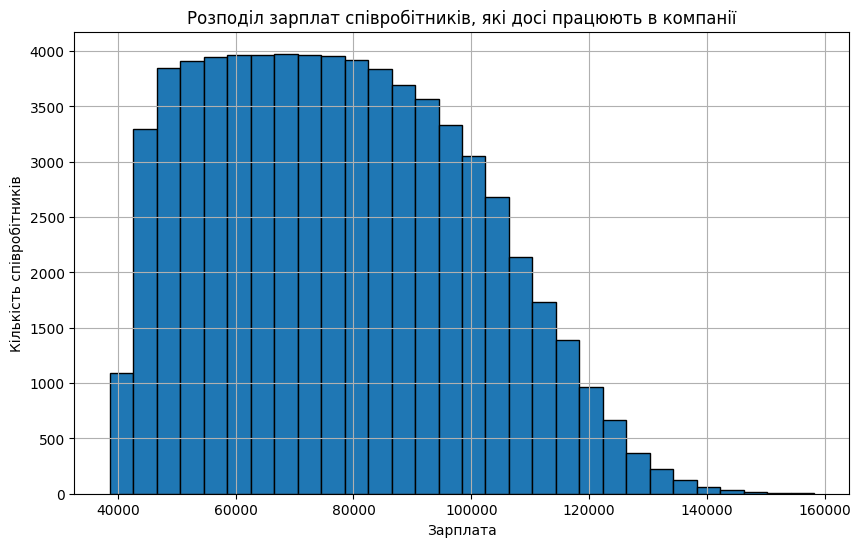

In [27]:
#Гістограмма:
plt.figure(figsize=(10, 6))
plt.hist(salary_distribution['salary'], bins=30, edgecolor='black')
plt.title('Розподіл зарплат співробітників, які досі працюють в компанії')
plt.xlabel('Зарплата')
plt.ylabel('Кількість співробітників')
plt.grid(True)
plt.show()


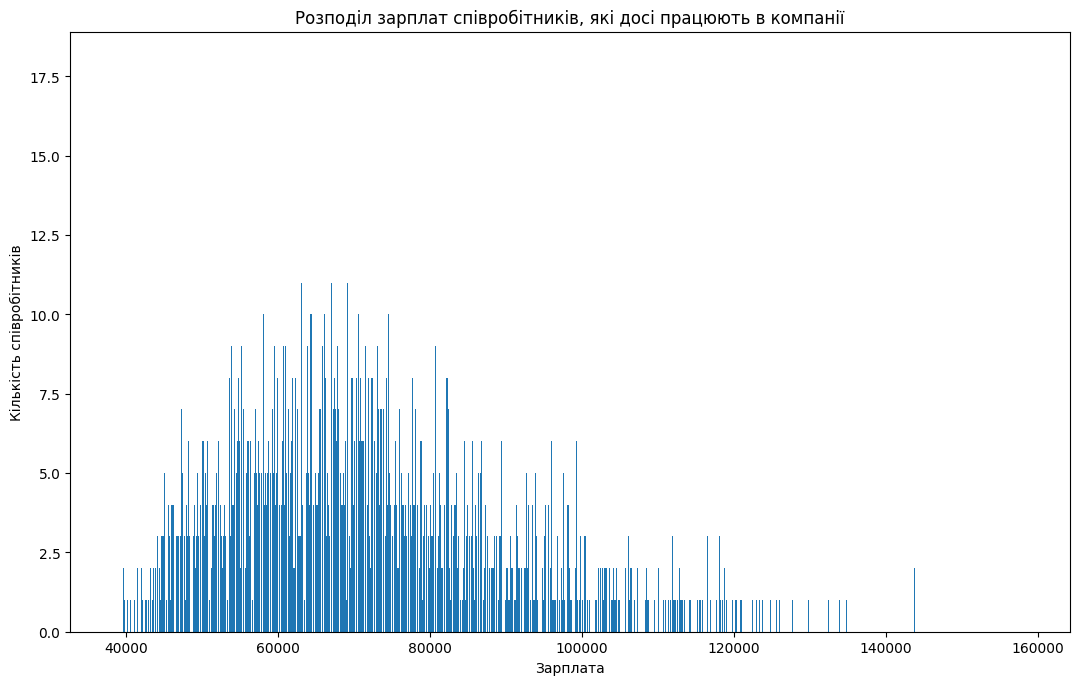

In [29]:
#Стовпчата діаграмма:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(salary_distribution['salary'], salary_distribution['employee_count'])
# Добавление подписи оси X
ax.set_xlabel('Зарплата')

# Добавление подписи оси Y
ax.set_ylabel('Кількість співробітників')

# Добавление названия диаграммы
ax.set_title('Розподіл зарплат співробітників, які досі працюють в компанії')

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()